In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import subprocess


In [215]:
key_order = ['def_80_256_1','def_80_512_1','def_80_1024_1','std_62_2048_1']

## Key size and timing stats


### Size of bootstrap keys

In [185]:
!ls -la keys/def_80_256_1/bsk00_3_*

-rw-r--r-- 1 jovyan users 12582968 Dec 27 10:10 keys/def_80_256_1/bsk00_3_3.json
-rw-r--r-- 1 jovyan users 16777272 Dec 27 10:10 keys/def_80_256_1/bsk00_3_4.json
-rw-r--r-- 1 jovyan users 20971576 Dec 27 10:10 keys/def_80_256_1/bsk00_3_5.json
-rw-r--r-- 1 jovyan users 25165880 Dec 27 10:10 keys/def_80_256_1/bsk00_3_6.json
-rw-r--r-- 1 jovyan users 29360184 Dec 27 10:10 keys/def_80_256_1/bsk00_3_7.json
-rw-r--r-- 1 jovyan users 33554488 Dec 27 10:10 keys/def_80_256_1/bsk00_3_8.json
-rw-r--r-- 1 jovyan users 37748792 Dec 27 10:10 keys/def_80_256_1/bsk00_3_9.json


In [186]:
def splitter(test):
    tmp = test.split()
    tst = [tmp[8].split("/")[1]]
    tst += tmp[8].split("/")[2].split(".")[0].split("_")[1:]
    tst.append(tmp[4])
    return tst

def convert(s):
    #if np.can_cast(s, to="int"):
    #    return int(s)
    x, u, b = s[:-1], s[-1], 1000
    return float(x) * {"K":b, "M":b**2, "G":b**3}[u]

temp = subprocess.getoutput("ls -la keys/def_80_512_1/b*")
temp.split("\n")[0]
splitter(temp.split("\n")[0])


['def_80_512_1', '3', '3', '50331704']

In [187]:
temp = subprocess.getoutput("ls -la keys/*/b*")

df = pd.DataFrame(
    [splitter(line) for line in temp.split("\n")], columns=["key","base log","level","file size"])
#df["file size"] = df["file size"].apply(convert)#/1e6
df["file size"] = df["file size"].apply(float)/1e6 # bytes -> MB 

#df.head()
df.pivot_table(values="file size", index=["level"], columns=["key","base log"], aggfunc="mean").round(1)


key      def_80_1024_1                             def_80_256_1              \
base log             3      4      5      6      7            3     4     5   
level                                                                         
3                201.3  201.3  201.3  201.3  201.3         12.6  12.6  12.6   
4                268.4  268.4  268.4  268.4  268.4         16.8  16.8  16.8   
5                335.5  335.5  335.5  335.5  335.5         21.0  21.0  21.0   
6                402.7  402.7  402.7  402.7  402.7         25.2  25.2  25.2   
7                469.8  469.8  469.8  469.8  469.8         29.4  29.4  29.4   
8                536.9  536.9  536.9  536.9  536.9         33.6  33.6  33.6   
9                604.0  604.0  604.0  604.0  604.0         37.7  37.7  37.7   

key                  def_80_512_1                             std_62_2048_1  \
base log     6     7            3      4      5      6      7             3   
level                                                                         
3         12.6  12.6         50.3   50.3   50.3   50.3   50.3         805.3   
4         16.8  16.8         67.1   67.1   67.1   67.1   67.1        1073.7   
5         21.0  21.0         83.9   83.9   83.9   83.9   83.9        1342.2   
6         25.2  25.2        100.7  100.7  100.7  100.7  100.7        1610.6   
7         29.4  29.4        117.4  117.4  117.4  117.4  117.4        1879.0   
8         33.6  33.6        134.2  134.2  134.2  134.2  134.2        2147.5   
9         37.7  37.7        151.0  151.0  151.0  151.0  151.0        2415.9   

key                                       
base log       4       5       6       7  
level                                     
3          805.3   805.3   805.3   805.3  
4         1073.7  1073.7  1073.7  1073.7  
5         1342.2  1342.2  1342.2  1342.2  
6         1610.6  1610.6  1610.6  1610.6  
7         1879.0  1879.0  1879.0  1879.0  
8         2147.5  2147.5  2147.5  2147.5  
9         2415.9  2415.9  2415.9  2415.9

### Size of secret keys

In [188]:
!ls -la keys/*/s*

-rw-r--r-- 1 jovyan users 2129 Dec 14 17:45 keys/def_80_1024_1/sk0_LWE.json
-rw-r--r-- 1 jovyan users 2166 Dec 14 17:45 keys/def_80_1024_1/sk0_RLWE.json
-rw-r--r-- 1 jovyan users  582 Dec 16 10:40 keys/def_80_256_1/sk0_LWE.json
-rw-r--r-- 1 jovyan users  618 Dec 16 10:40 keys/def_80_256_1/sk0_RLWE.json
-rw-r--r-- 1 jovyan users 1101 Dec 14 17:45 keys/def_80_512_1/sk0_LWE.json
-rw-r--r-- 1 jovyan users 1137 Dec 14 17:45 keys/def_80_512_1/sk0_RLWE.json
-rw-r--r-- 1 jovyan users 4177 Dec 14 17:45 keys/std_62_2048_1/sk0_LWE.json
-rw-r--r-- 1 jovyan users 4214 Dec 14 17:45 keys/std_62_2048_1/sk0_RLWE.json


In [189]:
def splitter(test):
    tmp = test.split()
    tst = [tmp[8].split("/")[1]]
    tst += tmp[8].split("/")[2].split(".")[0].split("_")[1:]
    tst.append(tmp[4])
    return tst

temp = subprocess.getoutput("ls -la keys/*/s*")
temp.split("\n")[0]
splitter(temp.split("\n")[0])


['def_80_1024_1', 'LWE', '2129']

In [190]:
temp = subprocess.getoutput("ls -la keys/*/s*")

df = pd.DataFrame(
    [splitter(line) for line in temp.split("\n")], columns=["key","type","file size"])
df["file size"] = (df["file size"].apply(float)/1e3) # bytes -> kB

#df.head()
df.pivot_table(values="file size", index="type", columns=["key"]).round(1)


key,def_80_1024_1,def_80_256_1,def_80_512_1,std_62_2048_1
type,,,,
LWE,2.1,0.6,1.1,4.2
RLWE,2.2,0.6,1.1,4.2


## Time for creating secret keys

In [191]:
!cat creat_sk_keys_log.txt


create_rlwe_key keys/std_62_2048_1/sk0_RLWE.json 0 4
create_lwe_key keys/std_62_2048_1/sk0_LWE.json 0 9
create_rlwe_key keys/def_80_256_1/sk0_RLWE.json 0 5
create_lwe_key keys/def_80_256_1/sk0_LWE.json 0 5
create_rlwe_key keys/def_80_512_1/sk0_RLWE.json 0 4
create_lwe_key keys/def_80_512_1/sk0_LWE.json 0 5
create_rlwe_key keys/def_80_1024_1/sk0_RLWE.json 0 4
create_lwe_key keys/def_80_1024_1/sk0_LWE.json 0 5
create_rlwe_key keys/std_62_2048_1/sk0_RLWE.json 0 5
create_lwe_key keys/std_62_2048_1/sk0_LWE.json 0 7


In [192]:
temp = subprocess.getoutput("cat creat_sk_keys_log.txt")
#print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[1].split("/")[1].split(".")[:1]
    tst += tmp[1].split("/")[2].split(".")[0].split("_")[1:]
    tst += tmp[-2:]
    return tst

#splitter(temp.split("\n")[0])

df = pd.DataFrame(
    [splitter(line) for line in temp.split("\n")], columns=["key","type","make time","save time"])
df["make time"] = df["make time"].apply(float) # ms
df["save time"] = df["save time"].apply(float) # ms

#df.head()
df.groupby(["key","type"]).mean().sort_index().T.round(1)


key       def_80_1024_1      def_80_256_1      def_80_512_1       \
type                LWE RLWE          LWE RLWE          LWE RLWE   
make time           0.0  0.0          0.0  0.0          0.0  0.0   
save time           5.0  4.0          5.0  5.0          5.0  4.0   

key       std_62_2048_1       
type                LWE RLWE  
make time           0.0  0.0  
save time           8.0  4.5

## Time for loading secret keys


In [193]:
!cat creat_bs_keys_log.txt | grep -v '^#' | grep '^load' | head


load_lwe_key keys/def_80_256_1/sk0_LWE.json 0
load_rlwe_key keys/def_80_256_1/sk0_RLWE.json 0
load_lwe_key keys/def_80_512_1/sk0_LWE.json 24
load_rlwe_key keys/def_80_512_1/sk0_RLWE.json 27
load_lwe_key keys/def_80_256_1/sk0_LWE.json 22761
load_rlwe_key keys/def_80_256_1/sk0_RLWE.json 0
load_lwe_key keys/def_80_512_1/sk0_LWE.json 0
load_rlwe_key keys/def_80_512_1/sk0_RLWE.json 0
load_lwe_key keys/def_80_256_1/sk0_LWE.json 0
load_rlwe_key keys/def_80_256_1/sk0_RLWE.json 0
grep: write error: Broken pipe


In [194]:
temp = subprocess.getoutput("cat creat_bs_keys_log.txt | grep -v '^#' | grep '^load'")
#print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[:1]
    tst += tmp[1].split("/")[1].split(".")[:1]
    #tst += tmp[1].split("/")[2].split(".")[0].split("_")[1:]
    tst += tmp[2:]
    return tst

splitter(temp.split("\n")[0])

df = pd.DataFrame(
    [splitter(line) for line in temp.split("\n")], columns=["test","key","time"])
df["time"] = df["time"].apply(float) # ms

df.head()
df.pivot_table(values="time", index=["test"], columns=["key"], aggfunc="mean").round(1)


key,def_80_1024_1,def_80_256_1,def_80_512_1,std_62_2048_1
test,,,,
load_lwe_key,0.4,615.7,1.2,0.5
load_rlwe_key,0.4,0.4,1.3,0.3


## Time for creating bootstrap keys

In [195]:
!cat creat_bs_keys_log.txt | grep -v '^#' | grep -v '^load' | head


make_bs_key keys/def_80_256_1/bsk00_5_3.json 757
save_bs_key keys/def_80_256_1/bsk00_5_3.json 2001
make_bs_key keys/def_80_512_1/bsk00_5_3.json 3837
save_bs_key keys/def_80_512_1/bsk00_5_3.json 10745
make_bs_key keys/def_80_256_1/bsk00_5_3.json 926
save_bs_key keys/def_80_256_1/bsk00_5_3.json 2195
make_bs_key keys/def_80_512_1/bsk00_5_3.json 3811
save_bs_key keys/def_80_512_1/bsk00_5_3.json 8110
make_bs_key keys/def_80_256_1/bsk00_5_3.json 779
save_bs_key keys/def_80_256_1/bsk00_5_3.json 2035


In [196]:
temp = subprocess.getoutput("cat creat_bs_keys_log.txt | grep -v '^#' | grep -v '^load'")
#print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[:1]
    tst += tmp[1].split("/")[1].split(".")[:1]
    tst += tmp[1].split("/")[2].split(".")[0].split("_")[1:]
    tst += tmp[2:]
    return tst

splitter(temp.split("\n")[0])

df = pd.DataFrame(
    [splitter(line) for line in temp.split("\n")], columns=["test","key","base log","level","time"])
#df["disk"] = df["disk"].apply(convert)/1e3
df["time"] = (df["time"].apply(float)/1e3) ## ms -> s

#df.head()
df.pivot_table(values="time", index=["test","level"], columns=["key","base log"], aggfunc="mean").round(1)


key               def_80_1024_1                         def_80_256_1        \
base log                      3     4     5     6     7            3     4   
test        level                                                            
make_bs_key 3              26.4  25.9  26.0  25.6  26.0          0.8   0.7   
            4              34.7  34.5  34.6  34.7  34.3          0.9   0.9   
            5              42.8  43.7  42.5  42.7  43.5          1.0   1.0   
            6              52.3  51.5  52.6  51.2  52.5          1.1   1.2   
            7              61.0  59.7  60.1  60.8  60.7          1.3   1.4   
            8              69.2  67.7  68.9  69.5  68.8          1.5   1.5   
            9              77.8  77.5  77.8  78.2  77.2          1.6   1.6   
save_bs_key 3              31.9  31.4  49.7  31.6  31.8          2.0   1.9   
            4              41.8  42.0  42.5  42.0  53.4          2.6   2.6   
            5              53.2  53.5  54.4  53.5  53.4          3.2  13.5   
            6              63.8  63.7  65.2  65.3  64.3          3.8   4.0   
            7              74.2  74.8  74.6  87.8  75.1          4.6   4.5   
            8              87.1  95.4  86.9  87.3  86.7          5.2   5.2   
            9              96.8  96.9  99.2  97.5  97.4          5.9   6.0   

key                              def_80_512_1                          \
base log             5    6    7            3     4     5     6     7   
test        level                                                       
make_bs_key 3      0.8  0.7  0.7          3.7   3.6   3.8   3.7   3.7   
            4      0.9  0.9  0.9          4.8   4.8   5.0   4.8   4.8   
            5      1.1  1.0  1.0          5.9   5.9   6.1   6.0   6.0   
            6      1.2  1.1  1.2          7.2   7.0   7.1   7.1   7.2   
            7      1.4  1.3  1.3          8.2   8.1   8.5   8.0   8.2   
            8      1.5  1.5  1.5          9.2   9.2   9.8   9.4   9.3   
            9      1.6  1.7  1.6         10.5  10.4  10.7  10.4  10.3   
save_bs_key 3      2.1  2.0  2.0         24.3   7.9   8.9   7.9  11.1   
            4      2.8  2.6  2.6         10.4  10.4  10.6  10.6  10.4   
            5      3.3  3.3  3.3         13.3  13.5  13.5  12.9  24.6   
            6      3.9  4.0  4.0         15.9  15.8  15.5  15.8  16.0   
            7      4.6  4.7  4.6         18.4  18.4  19.6  18.4  18.4   
            8      5.2  5.1  5.3         21.7  21.1  21.0  21.3  21.3   
            9      6.1  6.0  5.8         23.9  23.5  34.3  24.0  23.0   

key               std_62_2048_1                              
base log                      3      4      5      6      7  
test        level                                            
make_bs_key 3             204.2  201.9  206.1  202.2  205.8  
            4             272.4  272.6  274.7  269.7  275.4  
            5             341.7  340.3  338.1  342.8  345.6  
            6             409.5  411.4  409.5  413.9  405.8  
            7             479.3  481.3  474.0  474.1  480.5  
            8             549.1  539.1  552.2  555.6  551.8  
            9             619.3  623.4  625.3  613.9  618.2  
save_bs_key 3             128.2  128.4  129.5  126.9  128.7  
            4             170.9  172.0  179.1  170.5  172.2  
            5             214.0  211.2  220.5  215.9  219.5  
            6             256.1  255.9  258.1  259.4  260.7  
            7             303.6  300.9  328.2  324.6  305.7  
            8             345.8  350.7  351.8  352.7  342.8  
            9             387.7  394.0  391.4  399.8  388.9

## Timing and precision for addition tree

In [198]:
!tail add_tree_log.txt

# output: sk0_path, prec, padd, lower, upper, value, 
# times, load_time, enc_time, add_time, dec_time, answer


keys/std_62_2048_1/sk0_LWE.json 55 5 -1 1 0 32 327 252 1549 12 0
keys/std_62_2048_1/sk0_LWE.json 54 6 -1 1 0 64 320 123 1889 6 0
keys/def_80_256_1/sk0_LWE.json 2 5 -1 1 0 32 119 38 306 3 -0.6536691756580808
keys/def_80_256_1/sk0_LWE.json 1 6 -1 1 0 64 113 33 629 3 2.296842253562275
keys/def_80_512_1/sk0_LWE.json 12 5 -1 1 0 32 145 67 445 3 -0.0005551665903134051
keys/def_80_512_1/sk0_LWE.json 11 6 -1 1 0 64 147 61 886 4 0.0016767929573830997
keys/def_80_1024_1/sk0_LWE.json 33 5 -1 1 0 32 205 130 813 7 0.0000000002547935196162143
keys/def_80_1024_1/sk0_LWE.json 32 6 -1 1 0 64 205 118 1473 6 0.00000000029048408123344416
keys/std_62_2048_1/sk0_LWE.json 55 5 -1 1 0 32 321 253 1514 12 0
keys/std_62_2048_1/sk0_LWE.json 54 6 -1 1 0 64 330 126 1927 6 0


In [232]:
temp = subprocess.getoutput("cat add_tree_log.txt")
# print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[0].split("/")[1:2]
    tst += tmp[1:]
    return tst

#len(splitter(temp.split("\n")[0]))

df_add = pd.DataFrame([splitter(line) for line in temp.split("\n")], 
        columns=["key", "prec", "padd", "lower", "upper", "value", "times",
                 "load_time", "enc_time", "add_time", "dec_time", "answer"]) 
df_add["answer"] = df_add["answer"].apply(float)
df_add["times"] = df_add["times"].apply(int)
df_add["add_time"] = df_add["add_time"].apply(float)
df_add["one time"] = df_add["add_time"]/(df_add["times"]-1)

df_add.head()


,key,prec,padd,lower,upper,value,times,load_time,enc_time,add_time,dec_time,answer,one time
0,def_80_256_1,2,1,-1,1,0,2,14036,17,9.0,1,0.017885,9.000000
1,def_80_256_1,2,2,-1,1,0,4,131,33,35.0,2,-0.041357,11.666667
2,def_80_256_1,2,3,-1,1,0,8,120,34,70.0,2,-0.003264,10.000000
3,def_80_256_1,2,4,-1,1,0,16,104,32,123.0,2,-0.531718,8.200000
4,std_62_2048_1,2,1,-1,1,0,2,406,281,109.0,15,0.000000,109.000000


In [233]:
# addera: answer mean value

(df_add.pivot_table(values="answer", index=["key"], columns=["times"], aggfunc="mean").round(6)
        .sort_index(axis=1).loc[key_order])


times,2,4,8,16,32,64
key,,,,,,
def_80_256_1,0.000805,-0.001343,0.003108,-0.039673,0.134704,-1.128536
def_80_512_1,0.000002,0.000004,-0.000014,0.000019,-0.000021,-0.000385
def_80_1024_1,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000
std_62_2048_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [234]:
# addera: answer std 

(df_add.pivot_table(values="answer", index=["key"], columns=["times"], aggfunc="std").round(6)
        .sort_index(axis=1).loc[key_order])


times,2,4,8,16,32,64
key,,,,,,
def_80_256_1,0.014141,0.036976,0.11827,0.321566,0.797186,3.771476
def_80_512_1,0.000014,0.000039,0.00013,0.000302,0.000820,0.001995
def_80_1024_1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
std_62_2048_1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [235]:
# addera: timing of tree 

(df_add.pivot_table(values="add_time", index=["key"], columns=["times"], aggfunc="mean").round(1)
        .sort_index(axis=1).loc[key_order])


times,2,4,8,16,32,64
key,,,,,,
def_80_256_1,12.8,32.7,67.3,137.0,306.3,628.8
def_80_512_1,23.4,55.1,106.2,220.4,462.6,923.0
def_80_1024_1,45.6,94.6,208.1,417.6,812.1,1629.4
std_62_2048_1,82.5,194.6,394.5,848.7,1435.3,2189.8


In [236]:
# addera: mean time of single addition 

(df_add.pivot_table(values="one time", index=["key"], columns=["times"], aggfunc="mean").round(1)
        .sort_index(axis=1).loc[key_order])


times,2,4,8,16,32,64
key,,,,,,
def_80_256_1,12.8,10.9,9.6,9.1,9.9,10.0
def_80_512_1,23.4,18.4,15.2,14.7,14.9,14.7
def_80_1024_1,45.6,31.5,29.7,27.8,26.2,25.9
std_62_2048_1,82.5,64.9,56.4,56.6,46.3,34.8


### Timing and precision for integer multiplication tree

In [250]:
!tail mul_tree_log.txt

# output: sk0_path, prec, padd, lower, upper, value, 
# base2, mult, load_time, enc_time, add_time, dec_time, answer


keys/def_80_1024_1/sk0_LWE.json 35 3 0 2 1 8 4 194 335 110 8 3.9999999999498783
keys/def_80_1024_1/sk0_LWE.json 34 4 0 2 1 16 8 199 345 181 7 7.999999999939163
keys/def_80_1024_1/sk0_LWE.json 33 5 0 2 1 32 16 184 317 281 7 16.000000000333483
keys/def_80_1024_1/sk0_LWE.json 32 6 0 2 1 64 32 194 343 537 7 31.999999992407382
keys/std_62_2048_1/sk0_LWE.json 59 1 0 2 1 2 1 317 662 82 14 1
keys/std_62_2048_1/sk0_LWE.json 58 2 0 2 1 4 2 322 611 132 13 2
keys/std_62_2048_1/sk0_LWE.json 57 3 0 2 1 8 4 334 560 210 12 4
keys/std_62_2048_1/sk0_LWE.json 56 4 0 2 1 16 8 361 611 365 13 8
keys/std_62_2048_1/sk0_LWE.json 55 5 0 2 1 32 16 286 545 555 12 16
keys/std_62_2048_1/sk0_LWE.json 54 6 0 2 1 64 32 353 622 1085 13 32


In [251]:
temp = subprocess.getoutput("cat mul_tree_log.txt")
# print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[0].split("/")[1:2]
    tst += tmp[1:]
    return tst

#len(splitter(temp.split("\n")[0]))

df_mul = pd.DataFrame([splitter(line) for line in temp.split("\n")], 
    columns=["key", "prec", "padd", "lower", "upper", "value", "base2", "mult",
                 "load_time", "enc_time", "mul_time", "dec_time", "answer"]) 
df_mul["answer"] = df_mul["answer"].apply(float)
df_mul["base2"] = df_mul["base2"].apply(int)
df_mul["mul_time"] = df_mul["mul_time"].apply(float)

df_mul.head()


,key,prec,padd,lower,upper,value,base2,mult,load_time,enc_time,mul_time,dec_time,answer
0,def_80_256_1,6,1,0,2,1,2,1,121,153,15.0,3,0.986908
1,def_80_256_1,5,2,0,2,1,4,2,122,157,20.0,2,2.022192
2,def_80_256_1,4,3,0,2,1,8,4,114,155,36.0,3,3.950017
3,def_80_256_1,3,4,0,2,1,16,8,114,146,55.0,2,7.764319
4,def_80_256_1,2,5,0,2,1,32,16,114,149,100.0,3,7.452786


In [252]:
# mul: answer mean value

(df_mul.pivot_table(values="answer", index=["key"], columns=["base2"], aggfunc="mean").round(6)
        .sort_index(axis=1).loc[key_order])


base2,2,4,8,16,32,64
key,,,,,,
def_80_256_1,1.000574,1.997973,3.997894,7.979568,15.666238,31.953346
def_80_512_1,1.000001,2.000006,4.000000,8.000051,16.000399,31.999382
def_80_1024_1,1.000000,2.000000,4.000000,8.000000,16.000000,32.000000
std_62_2048_1,1.000000,2.000000,4.000000,8.000000,16.000000,32.000000


In [253]:
# mul: answer std value

(df_mul.pivot_table(values="answer", index=["key"], columns=["base2"], aggfunc="std").round(6)
        .sort_index(axis=1).loc[key_order])


base2,2,4,8,16,32,64
key,,,,,,
def_80_256_1,0.010312,0.043480,0.178826,0.816386,4.213142,18.804249
def_80_512_1,0.000011,0.000045,0.000167,0.000657,0.002956,0.012201
def_80_1024_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std_62_2048_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [254]:
# mult: timing of tree 

(df_mul.pivot_table(values="mul_time", index=["key"], columns=["base2"], aggfunc="mean").round(1)
        .sort_index(axis=1).loc[key_order])


base2,2,4,8,16,32,64
key,,,,,,
def_80_256_1,11.2,17.7,33.4,54.0,97.1,166.4
def_80_512_1,20.8,35.8,56.6,91.1,161.1,286.5
def_80_1024_1,41.9,66.5,107.4,171.4,291.5,520.5
std_62_2048_1,77.6,125.9,213.3,354.5,566.8,1035.1


### Timing and precision for real number multiplication

In [255]:
!tail mul_real_log.txt

# sk_path prec padd lower upper value mult max_mult, 
# load_time, enc_time, add_time, dec_time, answer


keys/def_80_512_1/sk0_LWE.json 1 4 -1 1 0.5 5 16 115 116 13 3 2.499724632512006
keys/def_80_512_1/sk0_LWE.json 2 4 -1 1 0.5 5 16 117 110 13 3 2.5002641692665115
keys/def_80_512_1/sk0_LWE.json 3 4 -1 1 0.5 5 16 141 141 16 3 2.500068600081999
keys/def_80_512_1/sk0_LWE.json 4 4 -1 1 0.5 5 16 139 138 16 3 2.500269161409328
keys/def_80_512_1/sk0_LWE.json 5 4 -1 1 0.5 5 16 144 147 15 3 2.5829537533643183
keys/def_80_512_1/sk0_LWE.json 6 4 -1 1 0.5 5 16 117 117 12 3 2.6249867872483996
keys/def_80_512_1/sk0_LWE.json 1 5 -1 1 0.5 5 16 140 146 16 3 2.5013580217685494
keys/def_80_512_1/sk0_LWE.json 2 5 -1 1 0.5 5 16 128 117 15 3 2.4982298236942775
keys/def_80_512_1/sk0_LWE.json 3 5 -1 1 0.5 5 16 138 133 16 3 2.5007442754037434
keys/def_80_512_1/sk0_LWE.json 4 5 -1 1 0.5 5 16 140 143 16 3 2.500778385008676


In [271]:
temp = subprocess.getoutput("cat mul_real_log.txt")
# print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[0].split("/")[1:2]
    tst += tmp[1:]
    return tst

#len(splitter(temp.split("\n")[0]))

df = pd.DataFrame([splitter(line) for line in temp.split("\n")], 
    columns=["key", "prec", "padd", "lower", "upper", "value", "mult", "max_mult",
                 "load_time", "enc_time", "mul_time", "dec_time", "answer"]) 
df["answer"] = df["answer"].apply(float)
df["padd"] = df["padd"].apply(int)
df["prec"] = df["prec"].apply(int)
df["mul_time"] = df["mul_time"].apply(float)
df_mulr = df[(df.padd>1)&(df.prec>1)].copy()

df_mulr.head()


,key,prec,padd,lower,upper,value,mult,max_mult,load_time,enc_time,mul_time,dec_time,answer
5,def_80_256_1,2,2,-1,1,0.5,5,16,115,108,9.0,2,2.096313
6,def_80_256_1,3,2,-1,1,0.5,5,16,115,122,9.0,2,2.316911
7,def_80_256_1,4,2,-1,1,0.5,5,16,116,109,9.0,2,2.575347
9,def_80_256_1,2,3,-1,1,0.5,5,16,105,99,8.0,2,2.838050
10,def_80_256_1,3,3,-1,1,0.5,5,16,114,122,9.0,2,3.395109


In [272]:
# mul: answer mean value

(df_mulr.pivot_table(values="answer", index=["key","prec"], columns=["padd"], aggfunc="mean").round(3)
        .sort_index(axis=1).loc[key_order]).T


key  def_80_256_1               def_80_512_1                              \
prec            2      3      4            2      3      4      5      6   
padd                                                                       
2           2.002  2.332  2.502          2.0  2.333  2.500  2.583  2.625   
3           2.989  3.013    NaN          3.0  3.000  3.214  3.321  3.375   
4           2.565    NaN    NaN          2.5  2.500  2.500  2.583  2.625   
5             NaN    NaN    NaN          2.5  2.500  2.500  2.500  2.540   
6             NaN    NaN    NaN          2.5  2.500  2.500  2.500  2.500   

key  def_80_1024_1                             std_62_2048_1                \
prec             2      3      4      5      6             2      3      4   
padd                                                                         
2              2.0  2.333  2.500  2.583  2.625           2.0  2.333  2.500   
3              3.0  3.000  3.214  3.321  3.375           3.0  3.000  3.214   
4              2.5  2.500  2.500  2.583  2.625           2.5  2.500  2.500   
5              2.5  2.500  2.500  2.500  2.540           2.5  2.500  2.500   
6              2.5  2.500  2.500  2.500  2.500           2.5  2.500  2.500   

key                 
prec      5      6  
padd                
2     2.583  2.625  
3     3.321  3.375  
4     2.583  2.625  
5     2.500  2.540  
6     2.500  2.500

In [273]:
# mul: answer std value

(df_mulr.pivot_table(values="answer", index=["key","prec"], columns=["padd"], aggfunc="std").round(3)
        .sort_index(axis=1).loc[key_order]).T


key  def_80_256_1               def_80_512_1                              \
prec            2      3      4            2      3      4      5      6   
padd                                                                       
2           0.086  0.080  0.084        0.000  0.000  0.000  0.000  0.000   
3           0.215  0.213    NaN        0.000  0.000  0.000  0.000  0.000   
4           0.501    NaN    NaN        0.000  0.000  0.000  0.000  0.000   
5             NaN    NaN    NaN        0.001  0.001  0.001  0.001  0.001   
6             NaN    NaN    NaN        0.002  0.001  0.001  0.001  0.001   

key  def_80_1024_1                     std_62_2048_1                      
prec             2    3    4    5    6             2    3    4    5    6  
padd                                                                      
2              0.0  0.0  0.0  0.0  0.0           0.0  0.0  0.0  0.0  0.0  
3              0.0  0.0  0.0  0.0  0.0           0.0  0.0  0.0  0.0  0.0  
4              0.0  0.0  0.0  0.0  0.0           0.0  0.0  0.0  0.0  0.0  
5              0.0  0.0  0.0  0.0  0.0           0.0  0.0  0.0  0.0  0.0  
6              0.0  0.0  0.0  0.0  0.0           0.0  0.0  0.0  0.0  0.0

In [275]:
# mult: timing of tree 

(df_mulr.pivot_table(values="mul_time", index=["key"], columns=["padd"], aggfunc="mean").round(3)
        .sort_index(axis=1).loc[key_order]).T



key,def_80_256_1,def_80_512_1,def_80_1024_1,std_62_2048_1
padd,,,,
2,8.683,15.346,23.652,42.800
3,8.750,15.534,23.956,43.202
4,9.610,15.402,23.694,43.166
5,NaN,15.232,23.674,43.384
6,NaN,15.164,24.444,43.080


### Timing and precision for dot product operation

In [295]:
!tail dot_prod_log.txt

# sk_path prec padd lower upper max_mult exp2, 
# load_time, enc_time, add_time, dec_time, answer


keys/std_62_2048_1/sk0_LWE.json 4 2 -1 1 10 1 297 535 205 10 0.625
keys/std_62_2048_1/sk0_LWE.json 4 2 -1 1 10 2 380 1085 467 11 4.0625
keys/std_62_2048_1/sk0_LWE.json 4 2 -1 1 10 3 321 2155 872 12 25
keys/std_62_2048_1/sk0_LWE.json 5 2 -1 1 10 1 327 573 221 11 0.6458333333333357
keys/std_62_2048_1/sk0_LWE.json 5 2 -1 1 10 2 359 949 405 9 4.197916666666671
keys/std_62_2048_1/sk0_LWE.json 5 2 -1 1 10 3 329 2171 876 12 25.833333333333343
keys/std_62_2048_1/sk0_LWE.json 6 2 -1 1 10 1 321 572 224 11 0.65625
keys/std_62_2048_1/sk0_LWE.json 6 2 -1 1 10 2 290 966 382 9 4.265625
keys/std_62_2048_1/sk0_LWE.json 6 2 -1 1 10 3 267 1761 813 10 26.25
keys/def_80_256_1/sk0_LWE.json 3 2 -1 1 10 1 116 120 39 2 0.47453337321548617


In [296]:
temp = subprocess.getoutput("cat dot_prod_log.txt")
# print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[0].split("/")[1:2]
    tst += tmp[1:]
    return tst

#len(splitter(temp.split("\n")[0]))

df = pd.DataFrame([splitter(line) for line in temp.split("\n")], 
    columns=["key", "prec", "padd", "lower", "upper", "max_mult", "exp2",
                 "load_time", "enc_time", "mul_time", "dec_time", "answer"]) 
df["answer"] = df["answer"].apply(float)
df["padd"] = df["padd"].apply(int)
df["prec"] = df["prec"].apply(int)
df["exp2"] = df["exp2"].apply(int)
df["mul_time"] = df["mul_time"].apply(float)
df_dot = df[(df.padd>1)&(df.prec>1)].copy()

df_dot.head()


,key,prec,padd,lower,upper,max_mult,exp2,load_time,enc_time,mul_time,dec_time,answer
0,def_80_512_1,3,3,-1,1,10,1,150,206,63.0,4,0.624959
1,def_80_512_1,3,3,-1,1,10,2,146,328,127.0,4,2.876069
2,def_80_512_1,3,3,-1,1,10,3,129,531,249.0,4,20.368740
3,def_80_512_1,4,3,-1,1,10,1,144,246,61.0,4,0.669566
4,def_80_512_1,4,3,-1,1,10,2,99,226,91.0,2,3.080274


In [297]:
# dot: answer mean value

(df_dot.pivot_table(values="answer", index=["key","prec"], columns=["exp2","padd"], aggfunc="mean").round(3)
        .sort_index(axis=1).loc[key_order]).T


key       def_80_256_1 def_80_512_1                         def_80_1024_1  \
prec                 3            3       4       5       6             3   
exp2 padd                                                                   
1    2           0.527        0.583   0.625   0.646   0.656         0.583   
     3             NaN        0.625   0.670   0.692   0.703         0.625   
     4             NaN        0.500   0.500   0.517   0.525         0.500   
     5             NaN        0.469   0.469   0.469   0.476         0.469   
     6             NaN        0.500   0.500   0.500   0.500         0.500   
     7             NaN        0.508   0.508   0.507   0.508         0.508   
     8             NaN        0.499   0.501   0.500   0.500         0.500   
2    2             NaN        3.792   4.062   4.198   4.266         3.792   
     3             NaN        2.875   3.080   3.183   3.234         2.875   
     4             NaN        2.937   2.937   3.035   3.084         2.938   
     5             NaN        3.032   3.031   3.031   3.080         3.031   
     6             NaN        3.016   3.016   3.015   3.016         3.016   
     7             NaN        2.991   2.993   2.993   2.994         2.992   
     8             NaN        3.000   2.996   2.996   2.993         2.996   
3    2             NaN       23.334  25.000  25.834  26.250        23.333   
     3             NaN       20.375  21.830  22.558  22.922        20.375   
     4             NaN       20.500  20.501  21.183  21.526        20.500   
     5             NaN       20.408  20.407  20.406  20.737        20.406   
     6             NaN       20.373  20.371  20.381  20.378        20.375   
     7             NaN       20.410  20.396  20.397  20.404        20.398   
     8             NaN       20.388  20.398  20.402     NaN        20.406   

key                               std_62_2048_1                          
prec            4       5       6             3       4       5       6  
exp2 padd                                                                
1    2      0.625   0.646   0.656         0.583   0.625   0.646   0.656  
     3      0.670   0.692   0.703         0.625   0.670   0.692   0.703  
     4      0.500   0.517   0.525         0.500   0.500   0.517   0.525  
     5      0.469   0.469   0.476         0.469   0.469   0.469   0.476  
     6      0.500   0.500   0.500         0.500   0.500   0.500   0.500  
     7      0.508   0.508   0.508         0.508   0.508   0.508   0.508  
     8      0.500   0.500   0.500         0.500   0.500   0.500   0.500  
2    2      4.063   4.198   4.266         3.792   4.062   4.198   4.266  
     3      3.080   3.183   3.234         2.875   3.080   3.183   3.234  
     4      2.937   3.035   3.084         2.938   2.938   3.035   3.084  
     5      3.031   3.031   3.080         3.031   3.031   3.031   3.080  
     6      3.016   3.016   3.016         3.016   3.016   3.016   3.016  
     7      2.992   2.992   2.992         2.992   2.992   2.992   2.992  
     8      2.996   2.996   2.996         2.996   2.996   2.996   2.996  
3    2     25.000  25.833  26.250        23.333  25.000  25.833  26.250  
     3     21.830  22.558  22.922        20.375  21.830  22.558  22.922  
     4     20.500  21.183  21.525        20.500  20.500  21.183  21.525  
     5     20.406  20.406  20.735        20.406  20.406  20.406  20.735  
     6     20.375  20.375  20.375        20.375  20.375  20.375  20.375  
     7     20.398  20.398  20.398        20.398  20.398  20.398  20.398  
     8     20.406  20.406  20.406        20.406  20.406  20.406  20.406

### Timing and precision for bootstrap operation

In [439]:
!cat boot_number_log.txt | grep '^keys' | tail

# sk_path prec padd lower upper value base_log level, 
# load_time, enc_time, add_time, dec_time, answer


keys/std_62_2048_1/sk0_LWE.json 4 3 -1 1 0 7 6 149316601 110 795537 6 -0.0031249908097341628
keys/std_62_2048_1/sk0_LWE.json 4 3 -1 1 0 7 7 176025009 97 957408 6 -0.0010416719248426132
keys/std_62_2048_1/sk0_LWE.json 4 3 -1 1 0 7 8 202420615 125 1032870 6 0.005208352634512359
keys/std_62_2048_1/sk0_LWE.json 4 3 -1 1 0 7 9 227231629 131 1110795 14 0.0072916914896286045
keys/std_62_2048_1/sk0_LWE.json 5 3 -1 1 0 3 3 73877374 100 519675 5538 N/A
keys/std_62_2048_1/sk0_LWE.json 5 3 -1 1 0 3 4 99210959 95 581613 5290 N/A
keys/std_62_2048_1/sk0_LWE.json 5 3 -1 1 0 3 5 124714506 96 707618 6 -0.15877016441576675
keys/std_62_2048_1/sk0_LWE.json 5 3 -1 1 0 3 6 152202568 119 764301 7 0.04057460171977967
keys/std_62_2048_1/sk0_LWE.json 5 3 -1 1 0 3 7 176179129 120 884427 6 -0.01720797450864109
keys/std_62_2048_1/sk0_LWE.json 5 3 -1 1 0 3 8 199373754 108 1004769 9 0.01005603284296197


In [440]:
temp = subprocess.getoutput("cat boot_number_log.txt | grep '^keys'")
# print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[0].split("/")[1:2]
    tst += tmp[1:]
    return tst

#len(splitter(temp.split("\n")[0]))

df = pd.DataFrame([splitter(line) for line in temp.split("\n")], 
    columns=["key", "prec", "padd", "lower", "upper", "value", "base_log", "level",
                 "load_time", "enc_time", "mul_time", "dec_time", "answer"]) 
df["answer"] = df["answer"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["padd"] = df["padd"].apply(int)
df["prec"] = df["prec"].apply(int)
df["value"] = df["value"].apply(float)
df["base_log"] = df["base_log"].apply(int)
df["level"] = df["level"].apply(int)
df["load_time"] = df["load_time"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["error"] = df["answer"] - df["value"]
df["flag"] = df["answer"].apply(lambda x: np.nan if np.isnan(x) else 1)
df["ind"] = (0*df["prec"] + df["padd"] + df["base_log"])*df_boot["flag"]
df_boot = df #[(df.padd>1)&(df.prec>1)].copy()

print(df_boot.key.unique())

df_boot.head()


['def_80_256_1' 'def_80_512_1' 'def_80_1024_1' 'std_62_2048_1']


,key,prec,padd,lower,upper,value,base_log,level,load_time,enc_time,mul_time,dec_time,answer,error
0,def_80_256_1,1,1,-1,1,0.0,3,3,1404214.0,31,8032,5214,NaN,NaN
1,def_80_256_1,1,1,-1,1,0.0,3,4,1812334.0,29,9622,5151,NaN,NaN
2,def_80_256_1,1,1,-1,1,0.0,3,5,2154189.0,28,10884,5223,NaN,NaN
3,def_80_256_1,1,1,-1,1,0.0,3,6,2557814.0,30,12486,4968,NaN,NaN
4,def_80_256_1,1,1,-1,1,0.0,3,7,2984433.0,29,15776,5264,NaN,NaN


In [441]:
# boot: answer mean value

df_boot.pivot_table(values="error", index=["key","prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").round(3).sort_index(axis=1) #.T.loc[key_order]


base_log                     3                                         4  \
level                        4      5      6      7      8      9      3   
key           prec padd                                                    
def_80_1024_1 1    1     0.336 -0.017 -0.021  0.043 -0.008  0.012 -0.078   
                   2       NaN -0.077  0.020 -0.032  0.000 -0.004    NaN   
                   3       NaN  0.020  0.019  0.031 -0.004 -0.008    NaN   
                   4       NaN  0.098  0.028 -0.001  0.004  0.055    NaN   
              2    1    -0.487 -0.031 -0.020  0.031 -0.016 -0.003  0.124   
...                        ...    ...    ...    ...    ...    ...    ...   
std_62_2048_1 5    1       NaN  0.073 -0.004 -0.008 -0.010 -0.015    NaN   
                   2       NaN -0.103  0.004 -0.001  0.000 -0.019    NaN   
                   3       NaN -0.159  0.041 -0.017  0.010    NaN    NaN   
              6    1       NaN -0.020  0.016  0.002  0.009 -0.011    NaN   
                   2       NaN  0.094  0.019  0.009 -0.009 -0.009    NaN   

base_log                                      ...      6                    7  \
level                        4      5      6  ...      7      8      9      3   
key           prec padd                       ...                               
def_80_1024_1 1    1     0.002  0.011 -0.055  ... -0.020  0.016  0.016 -0.021   
                   2     0.040 -0.032  0.016  ... -0.004 -0.008 -0.027  0.001   
                   3    -0.083  0.006  0.020  ...  0.035  0.031 -0.039  0.014   
                   4    -0.016  0.004 -0.004  ... -0.020  0.016  0.000  0.005   
              2    1     0.005 -0.016 -0.018  ... -0.003 -0.021 -0.031 -0.010   
...                        ...    ...    ...  ...    ...    ...    ...    ...   
std_62_2048_1 5    1     0.021  0.009  0.024  ...  0.025 -0.013 -0.008 -0.005   
                   2    -0.001  0.007  0.018  ...  0.007 -0.005  0.014 -0.011   
                   3       NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
              6    1    -0.010  0.013 -0.011  ... -0.005  0.010  0.004 -0.002   
                   2    -0.047  0.009 -0.015  ... -0.010 -0.003  0.002 -0.003   

base_log                                                           
level                        4      5      6      7      8      9  
key           prec padd                                            
def_80_1024_1 1    1     0.020  0.012 -0.035  0.023  0.062 -0.020  
                   2    -0.012 -0.008 -0.012  0.004  0.004  0.027  
                   3    -0.062  0.004  0.000 -0.008 -0.016 -0.027  
                   4    -0.066  0.008  0.039 -0.051 -0.020  0.008  
              2    1     0.013 -0.005  0.016  0.029 -0.021 -0.034  
...                        ...    ...    ...    ...    ...    ...  
std_62_2048_1 5    1     0.002  0.006  0.001 -0.000  0.004  0.007  
                   2     0.003  0.000 -0.026  0.001 -0.006  0.006  
                   3       NaN    NaN    NaN    NaN    NaN    NaN  
              6    1    -0.014 -0.010  0.002 -0.003 -0.012 -0.003  
                   2    -0.000  0.001 -0.004  0.004  0.005 -0.006  

[65 rows x 34 columns]

In [442]:
df_boot[df_boot.key == "def_80_1024_1"].pivot_table(values="error", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").round(3).T

prec                1                           2                           3  \
padd                1      2      3      4      1      2      3      4      1   
base_log level                                                                  
3        4      0.336    NaN    NaN    NaN -0.487    NaN    NaN    NaN -0.049   
         5     -0.017 -0.077  0.020  0.098 -0.031 -0.119  0.099 -0.098  0.013   
         6     -0.021  0.020  0.019  0.028 -0.020 -0.006  0.008 -0.047  0.011   
         7      0.043 -0.032  0.031 -0.001  0.031  0.019 -0.023 -0.017 -0.018   
         8     -0.008  0.000 -0.004  0.004 -0.016 -0.026  0.010  0.013  0.011   
         9      0.012 -0.004 -0.008  0.055 -0.003  0.008  0.003 -0.039 -0.016   
4        3     -0.078    NaN    NaN    NaN  0.124    NaN    NaN    NaN  0.110   
         4      0.002  0.040 -0.083 -0.016  0.005 -0.025  0.017  0.031  0.010   
         5      0.011 -0.032  0.006  0.004 -0.016  0.007 -0.015 -0.006 -0.019   
         6     -0.055  0.016  0.020 -0.004 -0.018  0.005 -0.018  0.013 -0.013   
         7     -0.012  0.023  0.004 -0.008  0.000  0.016 -0.005 -0.018  0.013   
         8      0.047  0.012 -0.031  0.023 -0.005  0.013 -0.013 -0.026 -0.004   
         9      0.004  0.031  0.016 -0.016  0.005 -0.029  0.016  0.010 -0.018   
5        3      0.036  0.040 -0.041 -0.461 -0.014 -0.008 -0.105  0.311  0.015   
         4      0.009  0.020 -0.030 -0.034  0.016  0.006  0.016  0.005  0.003   
         5      0.055 -0.004 -0.024 -0.032 -0.003 -0.005 -0.016  0.013  0.018   
         6      0.027 -0.023  0.023  0.031 -0.026  0.026 -0.003  0.010  0.002   
         7      0.020 -0.055 -0.020 -0.055  0.000 -0.021  0.034 -0.016 -0.009   
         8      0.031  0.004  0.012  0.027 -0.008 -0.016 -0.008 -0.003  0.047   
         9      0.016  0.020  0.012 -0.016 -0.010 -0.010  0.003  0.049 -0.013   
6        3     -0.004  0.025 -0.046  0.007  0.002  0.005 -0.010 -0.047  0.004   
         4     -0.016  0.008  0.008 -0.043 -0.010 -0.016 -0.016  0.003  0.013   
         5      0.066 -0.043 -0.000  0.000  0.029 -0.018  0.005  0.005  0.016   
         6      0.031  0.039 -0.027 -0.012 -0.005  0.008 -0.010 -0.008  0.016   
         7     -0.020 -0.004  0.035 -0.020 -0.003 -0.005  0.034  0.029 -0.016   
         8      0.016 -0.008  0.031  0.016 -0.021 -0.016  0.005  0.005  0.009   
         9      0.016 -0.027 -0.039  0.000 -0.031 -0.005 -0.003  0.010  0.031   
7        3     -0.021  0.001  0.014  0.005 -0.010  0.013  0.036 -0.004  0.002   
         4      0.020 -0.012 -0.062 -0.066  0.013  0.018 -0.021  0.000 -0.009   
         5      0.012 -0.008  0.004  0.008 -0.005 -0.018  0.013  0.005 -0.007   
         6     -0.035 -0.012  0.000  0.039  0.016 -0.013  0.018 -0.031 -0.007   
         7      0.023  0.004 -0.008 -0.051  0.029  0.003  0.013  0.000  0.007   
         8      0.062  0.004 -0.016 -0.020 -0.021 -0.008 -0.003 -0.026 -0.016   
         9     -0.020  0.027 -0.027  0.008 -0.034 -0.026 -0.044  0.044  0.004   

prec                   ...      4             5                           6  \
padd                2  ...      3      4      1      2      3      4      1   
base_log level         ...                                                    
3        4        NaN  ...    NaN    NaN -0.034    NaN    NaN    NaN  0.016   
         5      0.013  ...  0.113  0.067 -0.008  0.047  0.101  0.032 -0.027   
         6     -0.007  ...  0.041  0.018  0.009  0.001  0.002 -0.008 -0.006   
         7     -0.000  ...  0.021 -0.012  0.007  0.002  0.004 -0.004  0.021   
         8     -0.024  ... -0.019  0.002  0.004  0.006 -0.012 -0.016  0.004   
         9     -0.011  ... -0.002 -0.012 -0.020  0.010  0.000 -0.002 -0.020   
4        3        NaN  ...    NaN    NaN  0.017    NaN    NaN    NaN -0.013   
         4     -0.017  ... -0.008  0.020 -0.028  0.014 -0.022 -0.074  0.012   
         5      0.007  ...  0.001  0.017  0.005 -0.005 -0.009 -0.019  0.024   
         6     -0.002  ...  0.002 -0.002 -0.020  0.006

In [444]:
df_boot[df_boot.key == "def_80_256_1"].pivot_table(values="ind", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").T


base_log,level


In [445]:
df_boot[df_boot.key == "def_80_512_1"].pivot_table(values="ind", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").T


prec              1                   2                   3       ...    4  \
padd              1    2    3    4    1    2    3    4    1    2  ...    3   
base_log level                                                    ...        
3        4      4.0  5.0  NaN  NaN  4.0  5.0  NaN  NaN  4.0  5.0  ...  NaN   
         5      4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  4.0  5.0  ...  6.0   
         6      4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  4.0  5.0  ...  6.0   
         7      4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  4.0  5.0  ...  6.0   
         8      4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  4.0  5.0  ...  6.0   
         9      4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  4.0  5.0  ...  6.0   
4        3      5.0  6.0  NaN  NaN  5.0  6.0  NaN  NaN  5.0  6.0  ...  NaN   
         4      5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  5.0  6.0  ...  7.0   
         5      5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  5.0  6.0  ...  7.0   
         6      5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  5.0  6.0  ...  7.0   
         7      5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  5.0  6.0  ...  7.0   
         8      5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  5.0  6.0  ...  7.0   
         9      5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  5.0  6.0  ...  7.0   
5        3      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
         4      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
         5      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
         6      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
         7      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
         8      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
         9      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
6        3      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   
         4      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   
         5      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   
         6      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   
         7      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   
         8      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   
         9      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   

prec                   5                   6                 
padd              4    1    2    3    4    1    2    3    4  
base_log level                                               
3        4      NaN  4.0  5.0  NaN  NaN  4.0  5.0  NaN  NaN  
         5      7.0  4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  
         6      7.0  4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  
         7      7.0  4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  
         8      7.0  4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  
         9      7.0  4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  
4        3      NaN  5.0  6.0  NaN  NaN  5.0  6.0  NaN  NaN  
         4      NaN  5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  
         5      NaN  5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  
         6      NaN  5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  
         7      NaN  5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  
         8      NaN  5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  
         9      NaN  5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  
5        3      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
         4      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
         5      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
         6      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
         7      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
         8      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
         9      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
6        3      NaN  7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  
         4      NaN  7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  
         5      NaN  7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  
         6      NaN  7.0  NaN  NaN  NaN  7.0  N

In [446]:
df_boot[df_boot.key == "def_80_1024_1"].pivot_table(values="ind", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").T


prec              1                     2                     3       ...  \
padd              1    2     3     4    1    2     3     4    1    2  ...   
base_log level                                                        ...   
3        4      4.0  NaN   NaN   NaN  4.0  NaN   NaN   NaN  4.0  NaN  ...   
         5      4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0  ...   
         6      4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0  ...   
         7      4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0  ...   
         8      4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0  ...   
         9      4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0  ...   
4        3      5.0  NaN   NaN   NaN  5.0  NaN   NaN   NaN  5.0  NaN  ...   
         4      5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0  ...   
         5      5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0  ...   
         6      5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0  ...   
         7      5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0  ...   
         8      5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0  ...   
         9      5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0  ...   
5        3      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
         4      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
         5      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
         6      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
         7      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
         8      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
         9      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
6        3      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
         4      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
         5      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
         6      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
         7      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
         8      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
         9      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
7        3      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   
         4      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   
         5      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   
         6      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   
         7      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   
         8      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   
         9      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   

prec               4          5                     6                   
padd               3     4    1    2     3     4    1    2     3     4  
base_log level                                                          
3        4       NaN   NaN  4.0  NaN   NaN   NaN  4.0  NaN   NaN   NaN  
         5       6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  
         6       6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  
         7       6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  
         8       6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  
         9       6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  
4        3       NaN   NaN  5.0  NaN   NaN   NaN  5.0  NaN   NaN   NaN  
         4       7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  
         5       7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  
         6       7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  
         7       7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  
         8       7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  
         9       7.0   8.0  5.0  6.0   7.0   8.0  5.0  

In [447]:
df_boot[df_boot.key == "std_62_2048_1"].pivot_table(values="ind", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").T


prec              1               2               3               4       \
padd              1    2     3    1    2     3    1    2     3    1    2   
base_log level                                                             
3        5      4.0  5.0   6.0  4.0  5.0   6.0  4.0  5.0   6.0  4.0  5.0   
         6      4.0  5.0   6.0  4.0  5.0   6.0  4.0  5.0   6.0  4.0  5.0   
         7      4.0  5.0   6.0  4.0  5.0   6.0  4.0  5.0   6.0  4.0  5.0   
         8      4.0  5.0   6.0  4.0  5.0   6.0  4.0  5.0   6.0  4.0  5.0   
         9      4.0  5.0   6.0  4.0  5.0   6.0  4.0  5.0   6.0  4.0  5.0   
4        4      5.0  6.0   7.0  5.0  6.0   7.0  5.0  6.0   7.0  5.0  6.0   
         5      5.0  6.0   7.0  5.0  6.0   7.0  5.0  6.0   7.0  5.0  6.0   
         6      5.0  6.0   7.0  5.0  6.0   7.0  5.0  6.0   7.0  5.0  6.0   
         7      5.0  6.0   7.0  5.0  6.0   7.0  5.0  6.0   7.0  5.0  6.0   
         8      5.0  6.0   7.0  5.0  6.0   7.0  5.0  6.0   7.0  5.0  6.0   
         9      5.0  6.0   7.0  5.0  6.0   7.0  5.0  6.0   7.0  5.0  6.0   
5        3      6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   
         4      6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   
         5      6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   
         6      6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   
         7      6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   
         8      6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   
         9      6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   8.0  6.0  7.0   
6        3      7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   
         4      7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   
         5      7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   
         6      7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   
         7      7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   
         8      7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   
         9      7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   9.0  7.0  8.0   
7        3      8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0   
         4      8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0   
         5      8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0   
         6      8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0   
         7      8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0   
         8      8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0   
         9      8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0  10.0  8.0  9.0   

prec                    5              6       
padd               3    1    2    3    1    2  
base_log level                                 
3        5       6.0  4.0  5.0  6.0  4.0  5.0  
         6       6.0  4.0  5.0  6.0  4.0  5.0  
         7       6.0  4.0  5.0  6.0  4.0  5.0  
         8       6.0  4.0  5.0  6.0  4.0  5.0  
         9       6.0  4.0  5.0  NaN  4.0  5.0  
4        4       7.0  5.0  6.0  NaN  5.0  6.0  
         5       7.0  5.0  6.0  NaN  5.0  6.0  
         6       7.0  5.0  6.0  NaN  5.0  6.0  
         7       7.0  5.0  6.0  NaN  5.0  6.0  
         8       7.0  5.0  6.0  NaN  5.0  6.0  
         9       7.0  5.0  6.0  NaN  5.0  6.0  
5        3       8.0  6.0  7.0  NaN  6.0  7.0  
         4       8.0  6.0  7.0  NaN  6.0  7.0  
         5       8.0  6.0  7.0  NaN  6.0  7.0  
         6       8.0  6.0  7.0  NaN  6.0  7.0  
         7       8.0  6.0  7.0  NaN  6.0  7.0  
         8       8.0  6.0  7.0  NaN  6.0  7.0  
         9       8.0  6.0  7.0  NaN  6.0  7.0  
6        3       9.0  7.0  8.0  NaN  7.0  8.0  
         4       9.0  7.0  8.0  NaN  7.0  8.0  
         5       9.0  7.0  8.0  NaN  7.0  8.0  
         6       9.0  7.0  8.0  NaN  7.0  8.0  
         7       9.0  7.0  8.0  NaN  7.0  8.0  
         8       9.0  7.0  8.0  NaN  7.0  8.0  
         9       9.0  7.0  8.0  NaN  7.0  8

In [409]:
!cat boot_numbers2_log.txt | grep '^keys' | tail

# sk_path prec padd lower upper value base_log level, 
# load_time, enc_time, add_time, dec_time, answer


keys/def_80_1024_1/sk0_LWE.json 2 7 -1 1 0.20000000000000018 7 7 N/A 50 279076 4 0.2213273052902498 0.000000000000016581354345262443 43 21
keys/def_80_1024_1/sk0_LWE.json 2 7 -1 1 0.40000000000000013 7 7 N/A 50 272293 3 0.39324050646318165 0.000000000000016581354345262443 43 21
keys/def_80_1024_1/sk0_LWE.json 2 7 -1 1 0.6000000000000001 7 7 N/A 49 275025 3 0.6093476863335732 0.000000000000016581354345262443 43 21
keys/def_80_1024_1/sk0_LWE.json 2 7 -1 1 0.8 7 7 N/A 50 276484 3 0.7786653433583219 0.000000000000016581354345262443 43 21
keys/def_80_1024_1/sk0_LWE.json 2 7 -1 1 1 7 7 N/A 49 272220 3 1 0.000000000000016581354345262443 43 21
keys/def_80_1024_1/sk0_LWE.json 2 7 -1 1 -1 7 8 55194715 85 297927 5 -0.9895413867628756 0.00000000000001895011925157065 43 21
keys/def_80_1024_1/sk0_LWE.json 2 7 -1 1 -0.8 7 8 N/A 49 299195 4 -0.7968507252492145 0.00000000000001895011925157065 43 21
keys/def_80_1024_1/sk0_LWE.json 2 7 -1 1 -0.6 7 8 N/A 45 300349 4 -0.6041343302812646 0.00000000000001895

In [470]:
temp = subprocess.getoutput("cat boot_numbers2_log.txt | grep '^keys'") + "\n" \
     + subprocess.getoutput("cat boot_numbers_256_log.txt | grep '^keys'") + "\n" \
     + subprocess.getoutput("cat boot_numbers_512_log.txt | grep '^keys'") + "\n" \
     + subprocess.getoutput("cat boot_numbers_2048a_log.txt | grep '^keys'") + "\n" \
     + subprocess.getoutput("cat boot_numbers_2048b_log.txt | grep '^keys'")
# print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[0].split("/")[1:2]
    tst += tmp[1:]
    return tst

#len(splitter(temp.split("\n")[0]))

df = pd.DataFrame([splitter(line) for line in temp.split("\n")], 
    columns=["key", "prec", "padd", "lower", "upper", "value", "base_log", "level",
                 "load_time", "enc_time", "exc_time", "dec_time", "answer", "v1", "n1", "s1"]) 
df["answer"] = df["answer"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["padd"] = df["padd"].apply(int)
df["prec"] = df["prec"].apply(int)
df["value"] = df["value"].apply(float)
df["base_log"] = df["base_log"].apply(int)
df["level"] = df["level"].apply(int)
df["load_time"] = df["load_time"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["exc_time"] = df["exc_time"].apply(lambda a: np.nan if a=="N/A" else float(a)/1e6)
df["v1"] = df["v1"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["n1"] = df["n1"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["s1"] = df["s1"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["error"] = df["answer"] - df["value"]
df["flag"] = df["answer"].apply(lambda x: np.nan if np.isnan(x) else 1)
df["ind"] = (0*df["prec"] + df["padd"] + df["base_log"])*df["flag"]

df_boot2 = df #[(df.padd>1)&(df.prec>1)].copy()

print(df_boot2.key.unique())

df_boot2.head()


['def_80_1024_1' 'def_80_256_1' 'def_80_512_1' 'std_62_2048_1']


,key,prec,padd,lower,upper,value,base_log,level,load_time,enc_time,exc_time,dec_time,answer,v1,n1,s1,error,flag,ind
0,def_80_1024_1,1,1,-1,1,-1.0,3,3,12411264.0,59,0.151126,5832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,def_80_1024_1,1,1,-1,1,-1.0,3,4,16539347.0,78,0.178732,3,-0.929688,0.002609,62.0,2.0,0.070312,1.0,4.0
2,def_80_1024_1,1,1,-1,1,-0.8,3,4,NaN,49,0.181997,5,-0.853516,0.002609,62.0,2.0,-0.053516,1.0,4.0
3,def_80_1024_1,1,1,-1,1,-0.6,3,4,NaN,83,0.182302,4,-0.437500,0.002609,62.0,2.0,0.162500,1.0,4.0
4,def_80_1024_1,1,1,-1,1,-0.4,3,4,NaN,50,0.177786,2,-0.126953,0.002609,62.0,2.0,0.273047,1.0,4.0


In [471]:
df_boot2[df_boot2.key == "def_80_1024_1"].pivot_table(values="ind", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").T


prec              1                                             2       ...  \
padd              1    2     3     4     5     6     7     8    1    2  ...   
base_log level                                                          ...   
3        4      4.0  NaN   NaN   NaN   NaN   NaN   NaN   NaN  4.0  NaN  ...   
         5      4.0  5.0   6.0   7.0   NaN   NaN   NaN   NaN  4.0  5.0  ...   
         6      4.0  5.0   6.0   7.0   8.0   9.0  10.0   NaN  4.0  5.0  ...   
         7      4.0  5.0   6.0   7.0   8.0   9.0  10.0  11.0  4.0  5.0  ...   
         8      4.0  5.0   6.0   7.0   8.0   9.0  10.0  11.0  4.0  5.0  ...   
         9      4.0  5.0   6.0   7.0   8.0   9.0  10.0  11.0  4.0  5.0  ...   
4        3      5.0  NaN   NaN   NaN   NaN   NaN   NaN   NaN  5.0  NaN  ...   
         4      5.0  6.0   7.0   8.0   9.0   NaN   NaN   NaN  5.0  6.0  ...   
         5      5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  5.0  6.0  ...   
         6      5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  5.0  6.0  ...   
         7      5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  5.0  6.0  ...   
         8      5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  5.0  6.0  ...   
         9      5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  5.0  6.0  ...   
5        3      6.0  7.0   8.0   9.0   NaN   NaN   NaN   NaN  6.0  7.0  ...   
         4      6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0  6.0  7.0  ...   
         5      6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0  6.0  7.0  ...   
         6      6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0  6.0  7.0  ...   
         7      6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0  6.0  7.0  ...   
         8      6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0  6.0  7.0  ...   
         9      6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0  6.0  7.0  ...   
6        3      7.0  8.0   9.0  10.0  11.0  12.0  13.0   NaN  7.0  8.0  ...   
         4      7.0  8.0   9.0  10.0  11.0  12.0  13.0  14.0  7.0  8.0  ...   
         5      7.0  8.0   9.0  10.0  11.0  12.0  13.0  14.0  7.0  8.0  ...   
         6      7.0  8.0   9.0  10.0  11.0  12.0  13.0  14.0  7.0  8.0  ...   
         7      7.0  8.0   9.0  10.0  11.0  12.0  13.0  14.0  7.0  8.0  ...   
         8      7.0  8.0   9.0  10.0  11.0  12.0  13.0  14.0  7.0  8.0  ...   
         9      7.0  8.0   9.0  10.0  11.0  12.0  13.0  14.0  7.0  8.0  ...   
7        3      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   
         4      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   
         5      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   
         6      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   
         7      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   
         8      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   
         9      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   

prec               5          6                                           
padd               7     8    1    2     3     4     5     6     7     8  
base_log level                                                            
3        4       NaN   NaN  4.0  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         5       NaN   NaN  4.0  5.0   6.0   7.0   NaN   NaN   NaN   NaN  
         6      10.0   NaN  4.0  5.0   6.0   7.0   8.0   9.0  10.0   NaN  
         7      10.0  11.0  4.0  5.0   6.0   7.0   8.0   9.0  10.0  11.0  
         8      10.0  11.0  4.0  5.0   6.0   7.0   8.0   9.0  10.0  11.0  
         9      10.0  11.0  4.0  5.0   6.0   7.0   8.0   9.0  10.0  11.0  
4        3       NaN   NaN  5.0  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         4       NaN   NaN  5.0  6.0   7.0   8.0   9.0   NaN   NaN   NaN  
         5      11.0  12.0  5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  
         6      11.0  12.0  5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  
         7      11.0  12.0  5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  
         8      11.0  12.0

In [472]:
rmse = lambda x: (x**2).mean()**0.5

df_boot2[df_boot2.key == "def_80_1024_1"].pivot_table(values="error", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc=rmse).T


prec                   1                                                    \
padd                   1         2         3         4         5         6   
base_log level                                                               
3        4      0.272068       NaN       NaN       NaN       NaN       NaN   
         5      0.044013  0.071766  0.134237  0.254966       NaN       NaN   
         6      0.026155  0.024506  0.030735  0.039058  0.077806  0.131807   
         7      0.024528  0.023511  0.025649  0.021873  0.025701  0.028126   
         8      0.024873  0.022781  0.024833  0.021516  0.023448  0.021867   
         9      0.025679  0.026316  0.024445  0.022488  0.024446  0.024705   
4        3      0.261151       NaN       NaN       NaN       NaN       NaN   
         4      0.032258  0.042798  0.065443  0.129000  0.255906       NaN   
         5      0.023387  0.023438  0.024127  0.025818  0.028355  0.035145   
         6      0.023130  0.024548  0.024743  0.024323  0.026837  0.024117   
         7      0.023071  0.023208  0.025829  0.022437  0.025352  0.026044   
         8      0.027879  0.023718  0.022986  0.023375  0.022909  0.027130   
         9      0.026979  0.024571  0.025508  0.023976  0.021759  0.025651   
5        3      0.043128  0.071287  0.143311  0.291628       NaN       NaN   
         4      0.025536  0.024850  0.023425  0.027910  0.027922  0.041013   
         5      0.022595  0.022291  0.023492  0.026879  0.023978  0.022360   
         6      0.024125  0.022309  0.025974  0.023051  0.026678  0.026572   
         7      0.026371  0.025383  0.023200  0.023871  0.022490  0.025642   
         8      0.024692  0.024364  0.020745  0.027971  0.025744  0.022948   
         9      0.025173  0.025914  0.026074  0.024330  0.023560  0.025857   
6        3      0.025967  0.025766  0.030251  0.040129  0.069351  0.127215   
         4      0.024224  0.024692  0.025521  0.023288  0.021581  0.025336   
         5      0.024558  0.024878  0.026476  0.023575  0.025351  0.021858   
         6      0.021766  0.024923  0.024131  0.025425  0.030969  0.025705   
         7      0.025318  0.022646  0.025202  0.026895  0.024869  0.023691   
         8      0.021759  0.023927  0.024423  0.022663  0.025909  0.025174   
         9      0.023760  0.025023  0.025335  0.025266  0.023994  0.018655   
7        3      0.021990  0.023774  0.021978  0.024874  0.025202  0.031175   
         4      0.023943  0.024771  0.022820  0.025192  0.025423  0.024243   
         5      0.021880  0.021616  0.021847  0.020414  0.024783  0.024900   
         6      0.025265  0.022882  0.022531  0.024860  0.023226  0.024339   
         7      0.021721  0.028818  0.023928  0.024349  0.020554  0.022691   
         8      0.023754  0.025563  0.021632  0.029691  0.021846  0.023540   
         9      0.023439  0.024509  0.024315  0.022079  0.020593  0.025102   

prec                                       2            ...         5  \
padd                   7         8         1         2  ...         7   
base_log level                                          ...             
3        4           NaN       NaN  0.607197       NaN  ...       NaN   
         5           NaN       NaN  0.031236  0.051852  ...       NaN   
         6      0.283878       NaN  0.017510  0.016869  ...  0.936458   
         7      0.047159  0.081221  0.016287  0.016047  ...  0.427198   
         8      0.022295  0.028350  0.015965  0.016342  ...  0.191925   
         9      0.025540  0.024639  0.015763  0.015629  ...  0.330903   
4        3           NaN       NaN  0.430381       NaN  ...       NaN   
         4           NaN       NaN  0.021663  0.027422  ...       NaN   
         5      0.074442  0.137696  0.015829  0.015075  ...  0.573365   
         6      0.025718  0.026217  0.015821  0.014955  ...  0.192015   
         7      0.024922  0.025704  0.015652  0.015986  ...  0.330872   
         8      0.023976  0.026264  0.018267  0.015448  ...  0.022852   
         9      0.

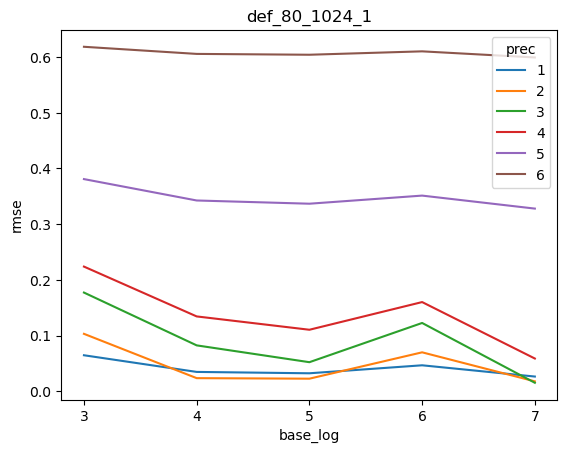

In [496]:
df_boot2[(df_boot2.key == "def_80_1024_1")&(df_boot2.base_log+df_boot2.level>8)].pivot_table(
    values="error", index=["prec"], 
    columns=["base_log"], aggfunc=rmse).T.plot(xticks=df_boot2.base_log.unique())
plt.ylabel("rmse")
plt.title("def_80_1024_1")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


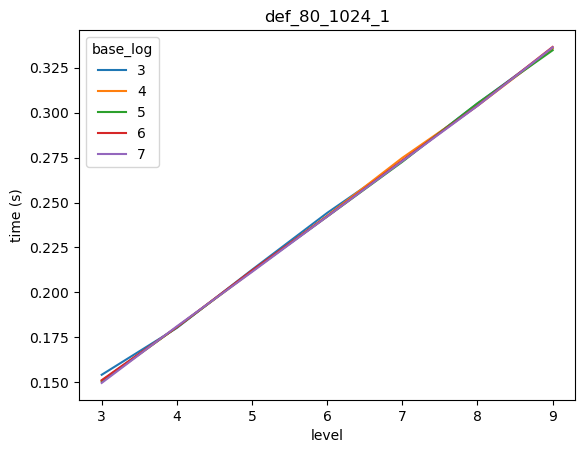

In [498]:
df_boot2[(df_boot2.key == "def_80_1024_1")&(df_boot2.base_log+df_boot2.level>-1)].pivot_table(
    values="exc_time", index=["level"], 
    columns=["base_log"], aggfunc="mean").plot(xticks=df_boot2.level.unique())
plt.ylabel("time (s)")
plt.title("def_80_1024_1")
plt.show()


In [475]:
rmse = lambda x: (x**2).mean()**0.5

df_boot2[df_boot2.key == "std_62_2048_1"].pivot_table(values="error", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc=rmse).T


prec                   1                                       2            \
padd                   1         2         3         4         1         2   
base_log level                                                               
3        5      0.062479  0.139342  0.252554       NaN  0.045070  0.099949   
         6      0.020428  0.022641  0.047852  0.063789  0.013808  0.015556   
         7      0.019711  0.015198  0.017693  0.022874  0.012472  0.011452   
         8      0.016823  0.018199  0.017963       NaN  0.010703  0.010876   
         9      0.016664  0.017917  0.015975       NaN  0.012550  0.010966   
4        4      0.040345  0.068064  0.143816       NaN  0.027877  0.048901   
         5      0.019507  0.017541  0.018042       NaN  0.011717  0.010737   
         6      0.017897  0.017854  0.017016       NaN  0.012192  0.011224   
         7      0.016457  0.016435  0.018742       NaN  0.011990  0.011450   
         8      0.016941  0.017555  0.017329       NaN  0.011039  0.010565   
         9      0.017367  0.015140  0.013789       NaN  0.011801  0.010738   
5        3      0.070443  0.130220  0.251400       NaN  0.044580  0.068133   
         4      0.016281  0.017678  0.017353       NaN  0.013663  0.012030   
         5      0.017105  0.017011  0.018367       NaN  0.010612  0.011434   
         6      0.015835  0.017930  0.017500       NaN  0.011240  0.011985   
         7      0.016491  0.015772  0.018329       NaN  0.010872  0.012534   
         8      0.015135  0.016700  0.016993       NaN  0.011348  0.012463   
         9      0.017343  0.015395  0.017955       NaN  0.010921  0.010610   
6        3      0.018813  0.022170  0.034563       NaN  0.013052  0.015103   
         4      0.015532  0.018445  0.018938       NaN  0.010989  0.012059   
         5      0.018663  0.017531  0.016921       NaN  0.010976  0.010584   
         6      0.016890  0.018010  0.018140       NaN  0.010430  0.011756   
         7      0.015689  0.018406  0.018796       NaN  0.010603  0.011288   
         8      0.016258  0.017602  0.017706       NaN  0.010742  0.010806   
         9      0.016866  0.015303  0.016915       NaN  0.012256  0.012469   
7        3      0.016217  0.016789  0.015573       NaN  0.010634  0.012093   
         4      0.016562  0.018060  0.015466       NaN  0.011434  0.010556   
         5      0.019228  0.018537  0.019945       NaN  0.011039  0.011726   
         6      0.017979  0.019435  0.015690       NaN  0.011204  0.010946   
         7      0.016912  0.015092  0.016592       NaN  0.011272  0.010906   
         8      0.019669  0.016945  0.017874       NaN  0.011694  0.010767   
         9      0.018694  0.016360  0.017348       NaN  0.010286  0.011827   

prec                             3                             4            \
padd                   3         1         2         3         1         2   
base_log level                                                               
3        5      0.522110  0.037109  0.469462  0.799487  0.334095  0.654345   
         6      0.028367  0.011150  0.014232  0.022600  0.009879  0.013259   
         7      0.011424  0.010746  0.009463  0.010464  0.010171  0.008618   
         8      0.011984  0.010559  0.009635  0.010398  0.010159  0.009110   
         9      0.011691  0.008427  0.009626  0.009383  0.009855  0.008886   
4        4      0.097203  0.020258  0.044190  0.394825  0.020849  0.469107   
         5      0.012888  0.010015  0.009690  0.010783  0.008571  0.009621   
         6      0.011679  0.009930  0.009373  0.009783  0.009652  0.009527   
         7      0.010699  0.009985  0.010101  0.008824  0.009033  0.009503   
         8      0.012663  0.010219  0.010082  0.009633  0.009227  0.009774   
         9      0.011529  0.010729  0.010314  0.010654  0.009282  0.008777   
5        3      0.560250  0.036262  0.477428  0.819452  0.275224  0.632944   
         4      0.012549  0.009602  0.008588  0.011442  0.010550  0.009644   
         5      0.010

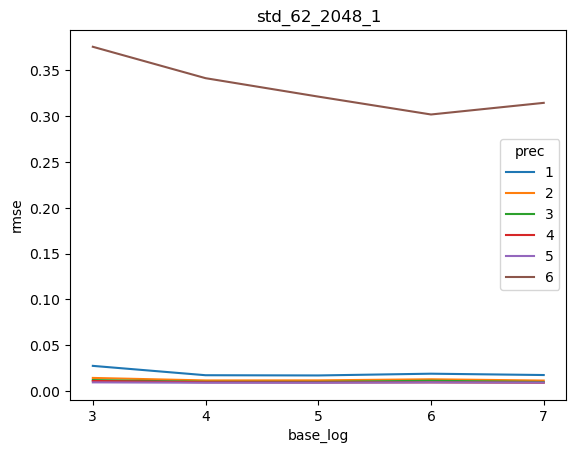

In [499]:
df_boot2[(df_boot2.key == "std_62_2048_1")&(df_boot2.base_log+df_boot2.level>8)].pivot_table(
    values="error", index=["prec"], 
    columns=["base_log"], aggfunc=rmse).T.plot(xticks=df_boot2.base_log.unique())
plt.ylabel("rmse")
plt.title("std_62_2048_1")
plt.show()


In [478]:
df_boot2[df_boot2.key == "std_62_2048_1"].pivot_table(values="exc_time", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").T


prec                   1                                       2            \
padd                   1         2         3         4         1         2   
base_log level                                                               
3        3      0.576350  0.485105  0.598623  0.531748  0.609267  0.501749   
         4      0.745057  0.596456  0.703446  0.590401  0.709990  0.608573   
         5      0.849987  0.687297  0.861590  0.687125  0.850998  0.700522   
         6      0.972760  0.806083  0.963209  0.813638  0.975406  0.794874   
         7      1.125350  0.936713  1.108265  0.914704  1.129329  0.918086   
         8      1.219474  0.988959  1.238103       NaN  1.218649  0.997419   
         9      1.398156  1.111925  1.347956       NaN  1.365058  1.117952   
4        3      0.599162  0.472530  0.642340       NaN  0.591223  0.483410   
         4      0.723050  0.589935  0.719578       NaN  0.716672  0.598538   
         5      0.847946  0.686378  0.853365       NaN  0.837232  0.699237   
         6      0.968616  0.782608  0.981059       NaN  0.971831  0.805214   
         7      1.117723  0.887402  1.106951       NaN  1.116009  0.911338   
         8      1.247016  1.008591  1.229149       NaN  1.207238  0.992807   
         9      1.342175  1.103647  1.367910       NaN  1.337560  1.102462   
5        3      0.612764  0.515056  0.595132       NaN  0.606993  0.495526   
         4      0.731391  0.598190  0.712619       NaN  0.732019  0.601212   
         5      0.861914  0.694606  0.849325       NaN  0.842960  0.690580   
         6      0.979134  0.813937  0.965665       NaN  0.986380  0.792715   
         7      1.113749  0.905984  1.109107       NaN  1.125364  0.910200   
         8      1.226299  0.993411  1.223127       NaN  1.233049  1.008554   
         9      1.353562  1.119524  1.341826       NaN  1.372186  1.100368   
6        3      0.601866  0.490963  0.603872       NaN  0.615368  0.482204   
         4      0.719364  0.593220  0.719654       NaN  0.726642  0.602826   
         5      0.848264  0.684171  0.842145       NaN  0.856360  0.701369   
         6      0.991113  0.806134  0.973950       NaN  0.968124  0.793741   
         7      1.097531  0.912828  1.100182       NaN  1.108359  0.885731   
         8      1.233201  0.976011  1.237401       NaN  1.245169  0.996543   
         9      1.374123  1.132681  1.337373       NaN  1.357324  1.098429   
7        3      0.594580  0.517435  0.602319       NaN  0.608691  0.496442   
         4      0.722063  0.627736  0.720200       NaN  0.727710  0.590900   
         5      0.861384  0.700660  0.863545       NaN  0.856746  0.697122   
         6      0.982354  0.806207  0.976408       NaN  0.982510  0.806039   
         7      1.114189  0.963304  1.106135       NaN  1.109392  0.911270   
         8      1.228155  1.012659  1.225274       NaN  1.234835  1.015358   
         9      1.372041  1.096987  1.357900       NaN  1.355460  1.120369   

prec                             3                             4            \
padd                   3         1         2         3         1         2   
base_log level                                                               
3        3      0.603299  0.594749  0.494778  0.623511  0.722992  0.516458   
         4      0.705713  0.724009  0.600713  0.697170  0.973163  0.587759   
         5      0.840109  0.841352  0.702129  0.849357  0.852310  0.699456   
         6      0.979320  0.978517  0.785087  0.967635  0.983380  0.793914   
         7      1.092844  1.101418  0.917521  1.082189  1.109014  0.918751   
         8      1.258492  1.217974  1.035662  1.236579  1.224028  0.991238   
         9      1.371281  1.330775  1.108191  1.337040  1.359427  1.103220   
4        3      0.596476  0.633945  0.488046  0.608726  0.618151  0.504602   
         4      0.721038  0.732859  0.601509  0.731884  0.730848  0.600970   
         5      0.855218  0.844500  0.694051  0.856293  0.850393  0.691966   
         6      0.984

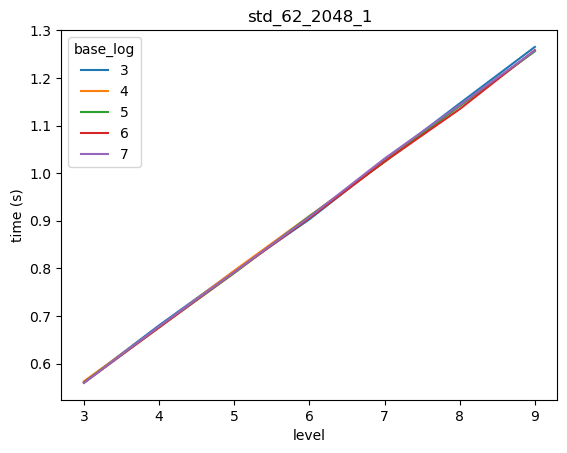

In [500]:
df_boot2[(df_boot2.key == "std_62_2048_1")&(df_boot2.base_log+df_boot2.level>-1)].pivot_table(
    values="exc_time", index=["level"], 
    columns=["base_log"], aggfunc="mean").plot(xticks=df_boot2.level.unique())
plt.ylabel("time (s)")
plt.title("std_62_2048_1")
plt.show()
